In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Csv Paths
housing_cleancsv = Path("./Resources/Housing/housing_clean.csv")
housing_per_yearcsv = Path("./Resources/Housing/housing_per_year.csv")
inflationcsv= Path ("./Resources/Inflation/Inflation Tradable & Non-tradable, annual movement.csv")
income_cleancsv = Path("./Resources/Income/income_clean.csv")

In [4]:
# Panda Reading
housing_clean = pd.read_csv(housing_cleancsv)
housing_per_year = pd.read_csv(housing_per_yearcsv)
inflation = pd.read_csv(inflationcsv)
income_clean = pd.read_csv(income_cleancsv)

In [5]:
#Introducing a new column 'Shift' to create a annual change percentage
housing_clean
housing_clean['Dwelling_Shift'] = housing_clean['Average Australian Dwelling ($000)'].shift(1)
#Using shift to create a new Column regarding Percentage change per Qty
housing_clean['% Change in Dwelling per Qtr'] = round ((housing_clean['Average Australian Dwelling ($000)'] /housing_clean['Dwelling_Shift']) *100 -100,2)
#Removing Shift column as no longer required
housing_clean = housing_clean.drop(columns=['Dwelling_Shift'])
housing_clean

,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr
0,2019 Qtr 2,638.9,NaN
1,2019 Qtr 3,660.8,3.43
2,2019 Qtr 4,691.0,4.57
3,2020 Qtr 1,690.2,-0.12
4,2020 Qtr 2,678.5,-1.70
5,2020 Qtr 3,689.5,1.62
6,2020 Qtr 4,728.5,5.66
7,2021 Qtr 1,779.0,6.93
8,2021 Qtr 2,835.7,7.28
9,2021 Qtr 3,863.7,3.35


In [6]:
#Introducing a new column 'Shift' to create a annual change percentage
housing_per_year
#Using shift to create a new Column regarding Percentage change per Qty
housing_per_year['Dwelling_Shift'] = housing_per_year['Average Australian Dwelling ($000)'].shift(1)
housing_per_year['% Change in Dwelling per Qtr'] = round ((housing_per_year['Average Australian Dwelling ($000)'] /housing_per_year['Dwelling_Shift']) *100 -100,2)
#Removing Shift column as no longer required
housing_per_year = housing_per_year.drop(columns=['Dwelling_Shift'])
housing_per_year

,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr
0,2018,NaN,NaN
1,2019,638.9,NaN
2,2020,678.5,6.20
3,2021,835.7,23.17
4,2022,961.1,15.01
5,2023,906.2,-5.71


In [7]:
inflation

,Date,Tradables,Non-tradables,Median
0,2018,0.6,2.4,1.50
1,2019,1.7,2.0,1.85
2,2020,-0.6,1.5,0.45
3,2021,4.9,2.8,3.85
4,2022,8.7,7.4,8.05
5,2023,1.5,5.4,3.45


In [8]:
income_clean

,Year,Income Per Week,Income Per Annum,% Change per Year
0,2018,1075,55900,NaN
1,2019,1100,57200,2.33
2,2020,1150,59800,4.55
3,2021,1200,62400,4.35
4,2022,1250,65000,4.17
5,2023,1300,67600,4.00


In [9]:
#Merging of 2 csv's for new Dataframe
housing_income_df = pd.concat([housing_clean, income_clean], axis =0)

In [10]:
#making column string to sort Values
housing_income_df["Year"] = housing_income_df["Year"].astype(str)

In [11]:
#Sorting Values
housing_income_df = housing_income_df.sort_values('Year')

In [12]:
housing_income_df


,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr,Income Per Week,Income Per Annum,% Change per Year
0,2018,NaN,NaN,1075.0,55900.0,NaN
1,2019,NaN,NaN,1100.0,57200.0,2.33
0,2019 Qtr 2,638.9,NaN,NaN,NaN,NaN
1,2019 Qtr 3,660.8,3.43,NaN,NaN,NaN
2,2019 Qtr 4,691.0,4.57,NaN,NaN,NaN
2,2020,NaN,NaN,1150.0,59800.0,4.55
3,2020 Qtr 1,690.2,-0.12,NaN,NaN,NaN
4,2020 Qtr 2,678.5,-1.70,NaN,NaN,NaN
5,2020 Qtr 3,689.5,1.62,NaN,NaN,NaN
6,2020 Qtr 4,728.5,5.66,NaN,NaN,NaN


In [15]:
#Creating new Column to adjust the value of Income per Annum so its comparable
housing_income_df['Income Per Annum($00)'] = housing_income_df['Income Per Annum'] / 100
housing_income_df.replace
housing_income_df

,Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr,Income Per Week,Income Per Annum,% Change per Year,Income Per Annum($00)
0,2018,NaN,NaN,1075.0,55900.0,NaN,559.0
1,2019,NaN,NaN,1100.0,57200.0,2.33,572.0
0,2019 Qtr 2,638.9,NaN,NaN,NaN,NaN,NaN
1,2019 Qtr 3,660.8,3.43,NaN,NaN,NaN,NaN
2,2019 Qtr 4,691.0,4.57,NaN,NaN,NaN,NaN
2,2020,NaN,NaN,1150.0,59800.0,4.55,598.0
3,2020 Qtr 1,690.2,-0.12,NaN,NaN,NaN,NaN
4,2020 Qtr 2,678.5,-1.70,NaN,NaN,NaN,NaN
5,2020 Qtr 3,689.5,1.62,NaN,NaN,NaN,NaN
6,2020 Qtr 4,728.5,5.66,NaN,NaN,NaN,NaN


In [16]:
#creating Variables for plotting
year = housing_income_df["Year"]
income = housing_income_df["Income Per Annum($00)"]
dwelling = housing_income_df["Average Australian Dwelling ($000)"]
income_per = housing_income_df["% Change per Year"]

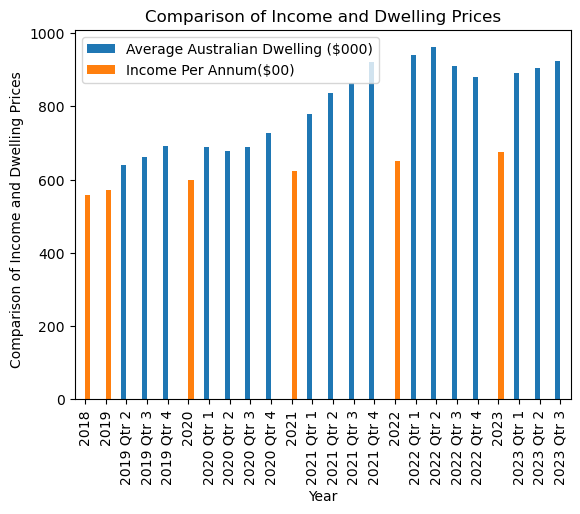

In [17]:
ax = housing_income_df.plot(x='Year', y=['Average Australian Dwelling ($000)', 'Income Per Annum($00)'], kind='bar')
# Setting the x-axis ticks and labels

ax.set_xticks(range(len(housing_income_df['Year'])))
ax.set_xticklabels(housing_income_df['Year'].astype(str))
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Comparison of Income and Dwelling Prices  ')
plt.title('Comparison of Income and Dwelling Prices')
# Showing the plot
plt.show()


In [18]:
#saving the plot
plt.savefig('Comparison of Income and Dwelling Prices')


<Figure size 640x480 with 0 Axes>

In [19]:
#removing a duplicate column not required within merge
housing_per_year = housing_per_year.drop(columns=['Year'])


In [20]:
#removing a duplicate column not required within merge
inflation = inflation.drop(columns=['Date'])

In [22]:
#Merging of data to compare percentages
Income_combined = pd.concat([income_clean, housing_per_year,inflation ], axis =1)
Income_combined

,Year,Income Per Week,Income Per Annum,% Change per Year,Average Australian Dwelling ($000),% Change in Dwelling per Qtr,Tradables,Non-tradables,Median
0,2018,1075,55900,NaN,NaN,NaN,0.6,2.4,1.50
1,2019,1100,57200,2.33,638.9,NaN,1.7,2.0,1.85
2,2020,1150,59800,4.55,678.5,6.20,-0.6,1.5,0.45
3,2021,1200,62400,4.35,835.7,23.17,4.9,2.8,3.85
4,2022,1250,65000,4.17,961.1,15.01,8.7,7.4,8.05
5,2023,1300,67600,4.00,906.2,-5.71,1.5,5.4,3.45


In [23]:
#changing column names to be more precise
Income_combined.rename(columns={'% Change per Year':'% Change in income per Year','% Change in Dwelling per Qtr':'% Change in Dwelling per Year'}, inplace = True)
                                #})
Income_combined

,Year,Income Per Week,Income Per Annum,% Change in income per Year,Average Australian Dwelling ($000),% Change in Dwelling per Year,Tradables,Non-tradables,Median
0,2018,1075,55900,NaN,NaN,NaN,0.6,2.4,1.50
1,2019,1100,57200,2.33,638.9,NaN,1.7,2.0,1.85
2,2020,1150,59800,4.55,678.5,6.20,-0.6,1.5,0.45
3,2021,1200,62400,4.35,835.7,23.17,4.9,2.8,3.85
4,2022,1250,65000,4.17,961.1,15.01,8.7,7.4,8.05
5,2023,1300,67600,4.00,906.2,-5.71,1.5,5.4,3.45


In [24]:
Income_combined

,Year,Income Per Week,Income Per Annum,% Change in income per Year,Average Australian Dwelling ($000),% Change in Dwelling per Year,Tradables,Non-tradables,Median
0,2018,1075,55900,NaN,NaN,NaN,0.6,2.4,1.50
1,2019,1100,57200,2.33,638.9,NaN,1.7,2.0,1.85
2,2020,1150,59800,4.55,678.5,6.20,-0.6,1.5,0.45
3,2021,1200,62400,4.35,835.7,23.17,4.9,2.8,3.85
4,2022,1250,65000,4.17,961.1,15.01,8.7,7.4,8.05
5,2023,1300,67600,4.00,906.2,-5.71,1.5,5.4,3.45


In [25]:
#Creating additional variables for plotting
dwelling_per_year = Income_combined['Average Australian Dwelling ($000)']
Inflation = Income_combined["Median"]

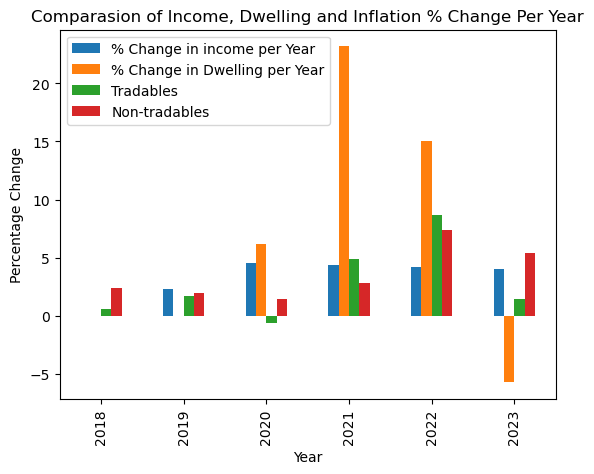

<Figure size 640x480 with 0 Axes>

In [26]:
# Plotting the bar graph
ax = Income_combined.plot(x='Year', y=['% Change in income per Year','% Change in Dwelling per Year','Tradables','Non-tradables'], kind='bar')
# Setting the x-axis ticks and labels
ax.set_xticks(range(len(Income_combined['Year'])))
ax.set_xticklabels((Income_combined['Year'].astype(int)))
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Comparasion of Income, Dwelling and Inflation % Change Per Year')
# Showing the plot
plt.show()
#saving the plot
plt.savefig('Comparasion of Income, Dwelling and Inflation % Change Per Year')

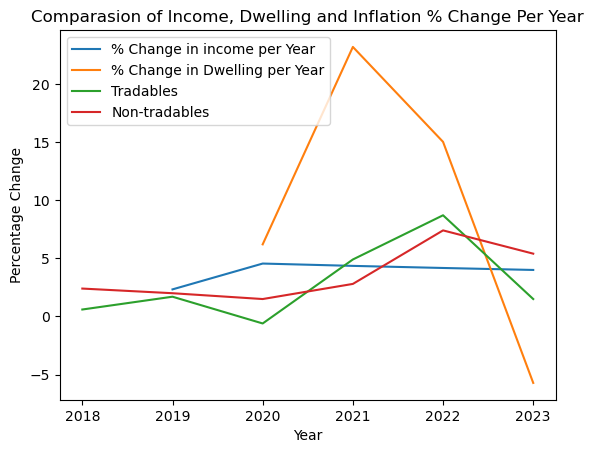

<Figure size 640x480 with 0 Axes>

In [27]:
# Plotting the line graph
ax = Income_combined.plot(x='Year', y=['% Change in income per Year','% Change in Dwelling per Year','Tradables','Non-tradables'], kind='line')
# Setting the x-axis ticks and labels
ax.set_xticks(Income_combined['Year'])
ax.set_xticklabels((Income_combined['Year'].astype(int)))
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Comparasion of Income, Dwelling and Inflation % Change Per Year')
# Showing the plot
plt.show()
plt.savefig('Comparasion of Income, Dwelling and Inflation % Change Per Year, Line Graph')
